In [53]:
import pandas as pd

In [54]:
alu_prices = pd.read_csv("../data/Aluminium Historical Data.csv")
gdp = pd.read_csv("../data/world gdp monthly.csv")
usd_index = pd.read_csv("../data/us-dollar-index-historical-chart.csv")
alu_production = pd.read_csv("../data/aluminuim_production.csv")
energy_index = pd.read_csv("../data/Global price of Energy index.csv")
usd_cad = pd.read_csv("../data/usd_canadian_dollar.csv")
usd_rupee = pd.read_csv("../data/usd_indian_rupee.csv")
usd_ruble = pd.read_csv("../data/usd_russian_ruble.csv")
usd_yuan = pd.read_csv("../data/CNY=X.csv")

In [55]:
alu_production = alu_production[["Date", "Africa", "North America", "South America", "Asia (ex China)", "Western & Central Europe", "Russia & Eastern Europe", "Oceania", "Gulf Cooperation Council", "China (Estimated)", "Estimated Unreported to IAI"]]
alu_production["Total"] = alu_production.sum(axis="columns", numeric_only=True)
alu_production["Date"] = pd.to_datetime(alu_production["Date"], format="%d/%m/%Y")
alu_production.rename(columns={"Total":"Production_total"}, inplace=True)
energy_index["DATE"] = pd.to_datetime(energy_index["DATE"], format="%Y-%m-%d")
energy_index.rename(columns={"DATE":"Date", "PNRGINDEXM":"Energy_index"}, inplace=True)
usd_rupee["Date"] = pd.to_datetime(usd_rupee["Date"], format="%Y-%m-%d")
usd_cad["Date"] = pd.to_datetime(usd_cad["Date"], format="%Y-%m-%d")
usd_ruble["Date"] = pd.to_datetime(usd_ruble["Date"], format="%Y-%m-%d")
usd_yuan["Date"] = pd.to_datetime(usd_yuan["Date"], format="%Y-%m-%d")
usd_rupee.rename(columns={"Open":"Open_usd_rupee"}, inplace=True)
usd_ruble.rename(columns={"Open":"Open_usd_ruble"}, inplace=True)
usd_yuan.rename(columns={"Open":"Open_usd_yuan"}, inplace=True)
usd_cad.rename(columns={"Open":"Open_usd_cad"}, inplace=True)

In [56]:
gdp["Date"] = pd.to_datetime(gdp["Date"])

In [57]:
usd_index["Date"] = pd.to_datetime(usd_index["Date"], format="%d/%m/%Y")

In [58]:
alu_prices["Date"] = pd.to_datetime(alu_prices["Date"]) 

In [59]:
alu_prices.Price = alu_prices.Price.apply(lambda x: x.replace(",", ""))
alu_prices["Price"] = alu_prices["Price"].astype("float")

In [60]:
test_df = pd.merge(left=alu_prices[["Date", "Price"]], right=gdp, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=alu_production, on="Date", how="left")
test_df = pd.merge(left=test_df, right=energy_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_ruble[["Date", "Open_usd_ruble"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_rupee[["Date", "Open_usd_rupee"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_cad[["Date", "Open_usd_cad"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_yuan[["Date", "Open_usd_yuan"]], on="Date", how="left")

In [61]:
test_df = test_df.sort_values("Date")

In [62]:
test_df = test_df.fillna(method="ffill")

In [63]:
test_df["Open_usd_rupee"].dropna()

2135    59.702999
2134    60.090000
2133    60.323002
2132    60.292999
2131    60.160000
          ...    
4       81.071404
3       81.495300
2       81.524902
1       81.519897
0       81.727699
Name: Open_usd_rupee, Length: 2136, dtype: float64

In [64]:
test_df.dropna(inplace=True)

In [65]:
import pandas as pd
from sklearn import linear_model

In [66]:
from mlxtend.preprocessing import minmax_scaling
test = minmax_scaling(test_df[["Price", "Energy_index", "USD_index", "Production_total"]], columns=["Price", "Energy_index", "USD_index", "Production_total"])
x = test[["Energy_index", "USD_index", "Production_total"]]
y = test["Price"]


In [67]:
test_df

,Date,Price,GDP,USD_index,Africa,North America,South America,Asia (ex China),Western & Central Europe,Russia & Eastern Europe,Oceania,Gulf Cooperation Council,China (Estimated),Estimated Unreported to IAI,Production_total,Energy_index,Open_usd_ruble,Open_usd_rupee,Open_usd_cad,Open_usd_yuan
2124,2014-07-01,1884.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,175.0,427.0,2340.0,150.0,4567.0,225.162905,33.857201,60.053001,1.06709,6.1938
2123,2014-07-02,1926.0,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,175.0,427.0,2340.0,150.0,4567.0,225.162905,34.332199,60.028000,1.06350,6.1900
2122,2014-07-03,1936.0,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,175.0,427.0,2340.0,150.0,4567.0,225.162905,34.273201,59.685001,1.06675,6.2006
2121,2014-07-04,1921.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,175.0,427.0,2340.0,150.0,4567.0,225.162905,34.169201,59.733002,1.06370,6.2020
2120,2014-07-07,1919.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,175.0,427.0,2340.0,150.0,4567.0,225.162905,34.450199,59.717999,1.06520,6.1941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-11-16,2412.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,151.0,501.0,3363.0,154.0,5669.0,330.149586,60.465000,81.071404,1.32735,7.0430
3,2022-11-17,2391.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,151.0,501.0,3363.0,154.0,5669.0,330.149586,60.740002,81.495300,1.33355,7.0872
2,2022-11-18,2430.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,151.0,501.0,3363.0,154.0,5669.0,330.149586,60.365002,81.524902,1.33214,7.1562
1,2022-11-21,2384.5,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,151.0,501.0,3363.0,154.0,5669.0,330.149586,60.035000,81.519897,1.33769,7.1189


In [68]:
x = test_df[test_df.columns[2:]]
y = test_df["Price"]

In [69]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [70]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 6152.055797563418
Coefficients: 
 [ 1.18330713e+01 -3.30452441e+00 -6.22942320e+11 -6.22942320e+11
 -6.22942320e+11 -6.22942320e+11 -6.22942320e+11 -6.22942320e+11
 -6.22942320e+11 -6.22942320e+11 -6.22942320e+11 -6.22942320e+11
  6.22942320e+11  3.75445946e+00  1.46209823e+01 -2.66188279e+01
 -2.32938009e+03 -2.05025594e+02]


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

d:\Uni\3. Semester\Projektseminar\tkseminar\tkseminar\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


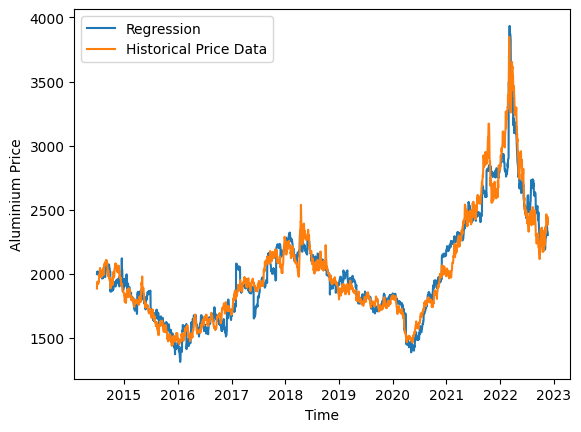

In [74]:
predictions = regr.predict(x.to_numpy())

plt.plot(test_df["Date"], predictions, label="Regression")
plt.plot(test_df["Date"], y, label = "Historical Price Data")
plt.ylabel("Aluminium Price")
plt.xlabel("Time")
plt.legend(loc="upper left")



In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y, predictions)

80.98069463302795

In [ ]:
test_df["Price"].mean()

2008.075011764706

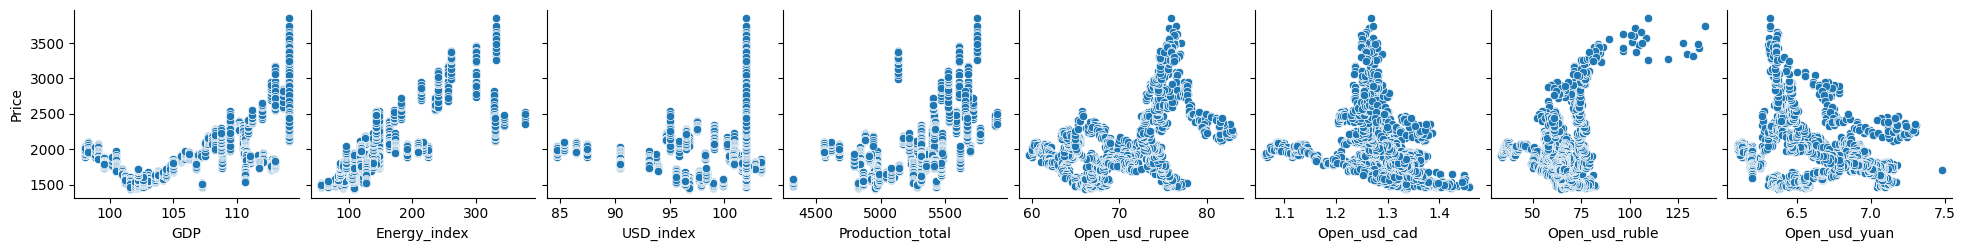

In [ ]:
sns.pairplot(data=test_df, y_vars=["Price"], x_vars=["GDP", "Energy_index", "USD_index", "Production_total", "Open_usd_rupee",
"Open_usd_cad", "Open_usd_ruble", "Open_usd_yuan"])

In [ ]:
usd_index[usd_index.USD_index > 102]


,Date,USD_index
0,1973-01-01,107.616
1,1973-02-01,103.046
110,1982-03-01,103.216
111,1982-04-01,103.700
112,1982-05-01,102.522
...,...,...
528,2017-01-01,103.089
551,2018-12-01,102.003
559,2019-08-01,102.809
560,2019-09-01,102.766
